# Correlation & Regression 相關與迴歸

賴志宏 Chi-Hung Lai 
created date: 2019.05.07, Last modified date: 2019.11.09

### 機器學習(machine learning)分為

- 監督式學習 (supervised learning)
- 非監督式學習 (unsupervised learning)
- 半監督式學習 (semisupervised learning)
- 增強學習 (reinforcement learning)  


- [機器學習學習地圖](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### 監督式學習的問題基本上分成兩類

* 迴歸問題：預測連續的回應資料，一種數值資料，我們可以預測商店的營業額、學生的身高和體重等。常用演算法有：線性迴歸、SVR等。
* 分類問題：預測可分類的回應資料，這是一些有限集合，我們可以分類成男與女、成功與失敗、癌症分成第1~4期等。常用演算法有：Logistic迴歸、決策樹、K鄰近演算法、CART、樸素貝葉斯等。


### 非監督式學習的問題基本上分成三類，如下所示：

* 關聯：找出各種現象同時出現的機率，稱為購物籃分析（Market-basket Analysis）
 * 當顧客購買米時，78%可能會同時購買雞蛋。
  * 常用演算法有：Apriori演算法等。
* 分群：將樣本分成相似的群組
  *這是資料如何組成的問題，可以幫助區分群出哪些喜歡同一類電影的觀眾。
  * 常用演算法有：K-means演算法等。
* 降維：減少資料集中變數的個數，但是仍然保留主要資訊而不失真，
 * 我們通常是使用特徵提取和選擇方法來實作。
 * 常用演算法有：主成分分析演算法等。


* Scikit-learn是scikits.learn的正式名稱，
* 一套支援Python 2和Python 3語言且完全免費的機器學習函數庫，
* 內建多種迴歸、分類和分群等機器學習演算法，
* 官方網址如下：http://scikit-learn.org/stable/


散佈圖的資料點可以幫助我們找出X和Y軸資料是正相關、負相關或無相關
* 正相關（Positive Relation）：圖表顯示當一軸增加；同時另一軸也增加，資料排列成一條往右斜向上的直線，例如：身高增加；體重也同時增加
<img src = "images/positive_relation.jpg" width = "300" height = "100">
* 負相關（Negative Relation）：圖表顯示當一軸增加；同時另一軸卻減少，資料排列成一條往右斜向下的直線，例如：打手遊的時間增加；讀書的時間就會減少
<img src = "images/negative_relation.jpg" width = "300" height = "100">
* 無相關（No Relation）：圖表顯示的資料點十分分散，看不出有任何直線的趨勢，例如：學生身高和期中考成績
<img src = "images/zero_relation.jpg" width = "300" height = "100">

    hours_phone_used  work_performance
0                0.0                87
1                0.0                89
2                0.0                91
3                1.0                90
4                1.3                82
5                1.5                80
6                2.0                78
7                2.2                81
8                2.6                76
9                3.2                85
10               4.1                80
11               4.4                75
12               4.4                73
13               5.0                72


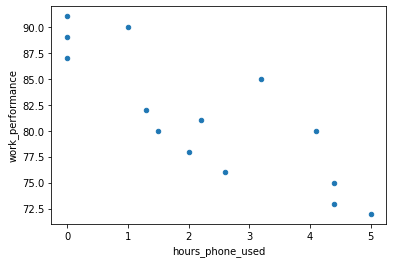

In [8]:
# ch13_1_1 revised
# 手機使用時數和工作效率

import pandas as pd
%matplotlib inline 
hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

df = pd.DataFrame({"hours_phone_used":hours_phone_used,
                   "work_performance":work_performance})

df.plot(kind="scatter", x="hours_phone_used", y="work_performance")

print(df)

## 共變數（Covariance）
* 用來測量2個隨機變數之間的關係，特別是指線性關係的強弱
* 變異數（Variance）可以告訴我們單一變數的離散程度
* 共變異數多了「共」，可以呈現2個變數一起的離散程度。

<img src = "images/covariance_formula.jpg" width = "500" height = "200" align="left">
<br /><br/>  
  

- 共變異數的判斷原則如下： 
     - 負相關：共變異數值小於0是負相關
     - 正相關：共變異數值大於0是正相關
     - 無相關：共變異數值約等於0，就是無相關

In [9]:
# ch13_1_2

import numpy as np

hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

x = np.array(hours_phone_used)
y = np.array(work_performance)
n = len(x)
x_mean = x.mean()
y_mean = y.mean()
print("資料數:", n)
print("x平均:", x_mean)
print("y平均:", y_mean)

diff = (x-x_mean)*(y-y_mean)
print("x偏差*y偏差和:", diff.sum())
covar = diff.sum()/n
print("共變異數:", covar)

資料數: 14
x平均: 2.264285714285714
y平均: 81.35714285714286
x偏差*y偏差和: -119.42142857142856
共變異數: -8.530102040816326


In [ ]:
import math
print(math.sqrt(15))
print(math.sqrt(3) * math.sqrt(5))

#### 用共變數來看兩個變數之間的關係
* 限制：共變數的值和使用的單位有關，例如：體重和身高的關係，身高的值使用公分，和使用公尺的值會不一樣
* 因此需要能夠有一個標準化的值，因此我們需要使用另一方式：以下介紹 "相關係數"

### 相關係數（Correlation Coefficient）
* 也稱為<b>皮爾森積差相關係數（Pearson Product Moment Correlation Coefficient）</b>
* 可以計算2個變數的線性相關性有多強
* 其值的範圍是-1~1之間
* 一種統計檢定方法，可以測量2個變數之間線性關係的強度和方向。
* 相關係數的公式是x和y的共變異數除以x和y的標準差

* 樣本的相關係數
<br />
<img src = "images/relation_coefficient.jpg" width = "150" height = "80" align="left"> <br /> <br /> <br /> <br />
<img src = "images/r_fomula.png" width = "200" height = "100" align="left"> 註：分子與分母共同除以n
<br /> <br /> <br /> <br /> <br /> <br />
* 母體的相關係數，常用希臘小寫字母 ρ (rho) 作為代表符號
<br />
<img src = "images/population_r.png" width = "300" height = "150" align="left">



### 推導過程

母數的變異數與共變數的不偏估計數的N要減1
<pre>
<img src = "images/nonbias_var.png" width = "400" height = "150" align="left"> <br /> <br /> <br /> <br /><br /><br /> <br /><br />

<img src = "images/r_formula2.png" width = "300" height = "150" align="left">

### 因果關係 vs. 相關性
* 相關性（Correlation）：量化相關性的值範圍在-1~1之間，即相關係數，我們可以使用相關係數的值來測量2個變數的走勢是如何相關和其強度，
 * 例如：相關係數的值接近1，表示1個變數增加；另一個變數也增加，接近-1，表示1個變數增加；另一個變數減少。
* 因果關係（Causation）：一個變數真的影響另一個變數，也就是說，一個變數真的可以決定另一個變數的值。
<br /> <br />
* 如果2個變數有因果關係，表示一定有相關性；
* 反之，有相關性，並不表示2個變數之間擁有因果關係


In [ ]:
# ch13_1_3  相關係數的算法
# pandas 的 corr()函式可以計算每一個欄位之間的相關係數

import numpy as np
import pandas as pd

hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

x = np.array(hours_phone_used)
y = np.array(work_performance)
n = len(x)
x_mean = x.mean()
y_mean = y.mean()

diff = (x-x_mean)*(y-y_mean)
covar = diff.sum()/n
print("共變異數:", covar)

corr = covar/(x.std()*y.std())
print("相關係數:", corr)

df = pd.DataFrame({"hours_phone_used":hours_phone_used,
                   "work_performance":work_performance})
print(df.corr())   # pandas 的 corr()函式可以計算每一個欄位之間的相關係數
df.corr().to_html("Ch13_1_3.html")

## 相關的統計檢定

In [ ]:
### SPSS 操作步驟
* 分析 / 相關 / 雙變數
* 輸入兩個變項
* 勾選所需的相關係數類型和其它設定 （顯著性訊號表示：當相關係數有統計意義時，以*表示）
* 勾選選項中的統計量（平均數與標準差）

結果：看Person相關係數及p 值



In [ ]:
# 資料來自邱皓政 量化研究法二 p.15-38

# 由家庭人口數預測家庭開銷

X = np.array([3, 5, 4, 6, 2, 4, 5, 8, 7, 5])
y = np.array ([15000, 34000, 22000, 36300, 16000, 25000, 30000, 45000, 44000, 39000])

### 斜率與截距
* 迴歸線的斜率是正值：迴歸線往右斜向上的斜率是正值（見上述圖例），x和y的關係是正相關，x值增加；同時y值也會增加。
* 迴歸線的斜率是負值：迴歸線往右斜向下的斜率是負值，x和y的關係是負相關，x值減少；同時y值也會減少。
<img src = "images/regression_line.jpg" width = 300 height = 100>
<img src = "images/intercept.png" width = 300 height = 100>


## 簡單線性迴歸（Simple Linear Regression）

* 是一種最簡單的線性迴歸分析法，只有1個解釋變數，這條線可以使用數學的一次方程式來表示，也就是2個變數之間關係的數學公式，如下所示：
<img src = "images/equation.jpg" width = 300 height = 100>


* 公式的變數y是反應變數（Response，或稱應變數），X是解釋變數（Explanatory，或稱自變數），a是截距（Intercept），b是迴歸係數(
Regression coefficients)


* 當從訓練資料找出截距a和迴歸係數b的值後，就完成預測公式。我們只需使用新值X，即可透過公式來預測y值。

## 使用最小評方法(least square)求出迴歸線:
### *　一條斜線，各點至此線之平行於　Y軸的距離的平方為為最小


<img src = "images/regression_line.png" width = 300 height = 100>


### 根據 X變數預測 Y變數時，截距a和斜率b的值

<img src = "images/intercept_formula.png" width = 300 height = 100>


In [ ]:
# by Lai


import numpy as np
x = np.array([29, 28, 34, 31,
                         25, 29, 32, 31,
                         24, 33, 25, 31,
                         26, 30])
y = np.array([7.7, 6.2, 9.3, 8.4,
                        5.9, 6.4, 8.0, 7.5,
                        5.8, 9.1, 5.1, 7.3,
                        6.5, 8.4])

# 繪圖
import matplotlib.pyplot as plt
plt.plot(x, y, 'go')
plt.show()

In [ ]:
# by Lai
# 計算迴歸係數（斜率）、截距、並預測
# 自己算

import numpy as np
x = np.array([29, 28, 34, 31,
                         25, 29, 32, 31,
                         24, 33, 25, 31,
                         26, 30])
y = np.array([7.7, 6.2, 9.3, 8.4,
                        5.9, 6.4, 8.0, 7.5,
                        5.8, 9.1, 5.1, 7.3,
                        6.5, 8.4])
n = len(x)
x_mean = x.mean()
y_mean = y.mean()

diff = (x-x_mean)*(y-y_mean)
covar = diff.sum()/n
print("共變異數:", covar)

b= covar/(x.std()** 2)
print("斜率（迴歸係數）：", b)

intercept = y_mean - b * x_mean
print("截距 intercept:", intercept)

print("迴歸線：Y= {}X + {}".format(b, intercept) )

x1 = np.array([26, 30])
y_predict = b * x1 + intercept
print('\n[26, 30]的y_predict:', y_predict)

# 繪圖
import matplotlib.pyplot as plt
x_new = np.linspace(x.min(), x.max(), 100)
y_new  = b * x_new + intercept
# plt.plot(x, y, 'go', x_new, y_new)
plt.plot(x, y, 'go')
plt.plot(x_new, y_new)
plt.plot(x1, y_predict, 'ro')
plt.show()

In [ ]:
# by Lai
# 計算迴歸係數（斜率）、截距、並預測
# 自己算

import numpy as np
x = np.array([11,10, 6, 5, 3, 7, 3, 8, 9, 2])
y = np.array([12, 9, 9, 7, 5, 5, 6, 6, 10, 3])
n = len(x)
x_mean = x.mean()
y_mean = y.mean()

diff = (x-x_mean)*(y-y_mean)
covar = diff.sum()/n
print("共變異數:", covar)

b= covar/(x.std()** 2)
print("斜率（迴歸係數）：", b)

intercept = y_mean - b * x_mean
print("intercept:", intercept)

print("迴歸線：Y= {}X + {}".format(b, intercept) )

x = 4.0
y_predict = b * x + intercept
print('y_predict:', y_predict)

In [ ]:
# ch15_2_2
# 計算迴歸係數（斜率）、截距、並預測
# 使用當日氣溫來預測當日的業積
# use object: LinearRegression

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31,
                         25, 29, 32, 31,
                         24, 33, 25, 31,
                         26, 30])
drink_sales = np.array([7.7, 6.2, 9.3, 8.4,
                        5.9, 6.4, 8.0, 7.5,
                        5.8, 9.1, 5.1, 7.3,
                        6.5, 8.4])
X = pd.DataFrame(temperatures, columns=["Temperature"])
target = pd.DataFrame(drink_sales, columns=["Drink_Sales"])
y = target["Drink_Sales"]

lm = LinearRegression()
lm.fit(X, y)    # train predict model
print("迴歸係數（斜率）:", lm.coef_)
print("截距:", lm.intercept_ )
# 預測氣溫26, 30度的業績
new_temperatures = pd.DataFrame(np.array([26, 30]))
predicted_sales = lm.predict(new_temperatures)
print(predicted_sales)

[6.08237885 7.57753304]


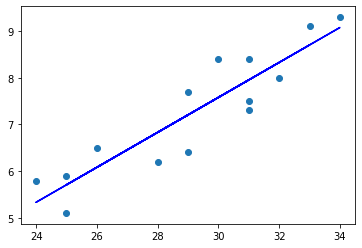

In [10]:
# ch15_2_2a
# 天氣預測營業額（千元）
# 繪出圖形

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

temperatures = np.array([29, 28, 34, 31,
                         25, 29, 32, 31,
                         24, 33, 25, 31,
                         26, 30])
drink_sales = np.array([7.7, 6.2, 9.3, 8.4,
                        5.9, 6.4, 8.0, 7.5,
                        5.8, 9.1, 5.1, 7.3,
                        6.5, 8.4])
X = pd.DataFrame(temperatures, columns=["Temperature"])
target = pd.DataFrame(drink_sales, columns=["Drink_Sales"])
y = target["Drink_Sales"]
lm = LinearRegression()
lm.fit(X, y)
# 預測氣溫26, 30度的業績
new_temperatures = pd.DataFrame(np.array([26, 30]))
predicted_sales = lm.predict(new_temperatures)
print(predicted_sales)

plt.scatter(temperatures, drink_sales)  # 繪點
regression_sales = lm.predict(X)
plt.plot(temperatures, regression_sales, color="blue")
#plt.plot(new_temperatures, predicted_sales, 
#         color="red", marker="o", markersize=10)
plt.show()

迴歸係數: [0.62513172]
截距: -48.60353530031602
[50.7924078  51.41753952 52.04267123]


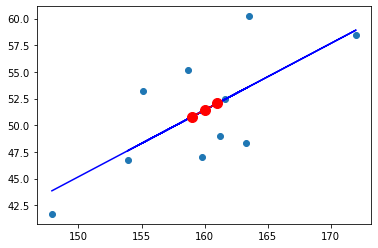

In [4]:
# ch15_2_2b revised
# 身高預測體重

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

heights = np.array([147.9, 163.5, 159.8, 155.1,
                    163.3, 158.7, 172.0, 161.2,
                    153.9, 161.6])
weights = np.array([41.7, 60.2, 47.0, 53.2,
                    48.3, 55.2, 58.5, 49.0,
                    46.7, 52.5])
X = pd.DataFrame(heights, columns=["Height"])
target = pd.DataFrame(weights, columns=["Weight"])  # 資料型態為 DataFrame
y = target["Weight"]       # 資料型態為 Series, 也可以直接使用 y = pd.Series(weights)
lm = LinearRegression()
lm.fit(X, y)                # 也可以直接使用 lm.fit(x, weights)
print("迴歸係數:", lm.coef_)
print("截距:", lm.intercept_ )

# 預測身高150, 160, 170的體重
new_heights = pd.DataFrame(np.array([159, 160, 161]))
predicted_weights = lm.predict(new_heights)
print(predicted_weights)

plt.scatter(heights, weights)  # 繪點
regression_weights = lm.predict(X)
plt.plot(heights, regression_weights, color="blue")
plt.plot(new_heights, predicted_weights, 
         color="red", marker="o", markersize=10)
plt.show()

## 迴歸是否有達到統計意義 （統計學的議題）

### SPSS 作法：
* 分析 / 迴歸方法 / 線性
 * 輸入自變項與依變項
 * 進入統計量勾選各種統計量（估計值、共變異數矩陣、描述性統計量、模式適合度）
 * 按確定


 <img src = "images/SS.png" width = "500" height = "200" align="left"> <br /> <br /> <br /> <br />



 <img src = "images/regression_table1.png" width = "500" height = "200" align="left"> <br /> <br /> <br /> <br />



 <img src = "images/regression_table2.png" width = "500" height = "200" align="left"> <br /> <br /> <br /> <br />



迴歸模型的變異數分析摘要表可參考邱皓政，量化統計二，p.15-33

In [ ]:
# 資料來自邱皓政 量化研究法二 p.15-45
# 由家庭人口數預測家庭開銷

import pandas as pd
import numpy as np

import statsmodels.api as sm

X = np.array([3, 5, 4, 6, 2, 4, 5, 8, 7, 5])
y = np.array ([15000, 34000, 22000, 36300, 16000, 25000, 30000, 45000, 44000, 39000])

# model = sm.OLS(y,X)
model = sm.OLS(y, sm.add_constant(X))   # statsmodels.OLS 不會假設迴歸模型有常數項，所以要自己加入常數（截距）
results = model.fit()
print("截距與斜率:", results.params) # 顯示截距與斜率
print()
print(results.summary())

In [ ]:
# 結果解釋：

R-squared: 0.885 表示家庭人口數可以解釋每月開銷的88.5%的變異量
F(1, 8) = 61.48,  p=5.04e-05 < .05 顯示迴歸模型具有統計意義
(註：迴歸模型有統計意義之後，再看每個自變項的係數是否有統計意義，自變項有可能不只一個)

係數估計的結果指出：斜率為 5706.9204，截距為 2666.0900，其 t = 7.841 , p value <.05，
  表示人口數對家庭開銷有預測效益（需拒絕虛無假設：迴歸係數= 0）
    
迴歸模型的變異數分析摘要表可參考邱皓政，量化統計二，p.15-33

## 線性複迴歸 （Linear Multiple Regression):或稱多元迴歸
### * 多個解釋變數（自變數），一個反應變數（依變數）


In [27]:
# ch15_3_1
# 腰圍和身高預測體重

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

waist_heights = np.array([[67,160], [68,165], [70,167], 
                          [65,170], [80,165], [85,167],
                          [78,178], [79,182], [95,175],
                          [89,172]])
weights = np.array([50, 60, 65, 65,
                    70, 75, 80, 85,
                    90, 81])
X = pd.DataFrame(waist_heights, columns=["Waist", "Height"])
target = pd.DataFrame(weights, columns=["Weight"])
print(waist_heights)
print(X)
y = target["Weight"]
print(type(y))
lm = LinearRegression()
lm.fit(X, y)
print("迴歸係數:", lm.coef_)
print("截距:", lm.intercept_ )

# 預測腰圍和身高[66,164],[82,172]的體重
new_waist_heights = pd.DataFrame(np.array([[66, 164],
                                           [82, 172]]))
predicted_weights = lm.predict(new_waist_heights)
print(predicted_weights)

print(type(target))
print(target)
print("\ny:", y, sep='\n')
print(type(y))


[[ 67 160]
 [ 68 165]
 [ 70 167]
 [ 65 170]
 [ 80 165]
 [ 85 167]
 [ 78 178]
 [ 79 182]
 [ 95 175]
 [ 89 172]]
   Waist  Height
0     67     160
1     68     165
2     70     167
3     65     170
4     80     165
5     85     167
6     78     178
7     79     182
8     95     175
9     89     172
<class 'pandas.core.series.Series'>
迴歸係數: [0.71013574 1.07794276]
截距: -166.36459730650577
[57.28697457 77.2726885 ]
<class 'pandas.core.frame.DataFrame'>
   Weight
0      50
1      60
2      65
3      65
4      70
5      75
6      80
7      85
8      90
9      81

y:
0    50
1    60
2    65
3    65
4    70
5    75
6    80
7    85
8    90
9    81
Name: Weight, dtype: int32
<class 'pandas.core.series.Series'>


In [69]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("107年結婚對數.csv")

x = pd.concat([data['一月'], data['二月']], axis=1)
y = data['三月']

lm = LinearRegression()
lm.fit(x, y)
print("迴歸係數:", lm.coef_)
print("截距:", lm.intercept_ )

# Independent Variable
x_test = np.array([[310, 149],
                   [287, 183],
                   [55, 41],
                   [102, 79],
                   [125, 77],
                   [61, 32],
                   [112, 60],
                   [158, 104],
                   [82, 49],
                   [147, 99],])
new = pd.DataFrame(x_test, columns=['一月', '二月'])
print(x)
print(x_test)





truth = np.array([263,237,58,96,95,55,86,111,78,117])
truth = pd.DataFrame(truth, columns=["實際結果"])
predicted = lm.predict(new)
print(predicted)
predicted = pd.DataFrame(predicted, columns=["預測結果"])
pd.concat([new, predicted ,truth], axis=1)

迴歸係數: [ 0.86040532 -0.1070237 ]
截距: 5.23058799935211
     一月   二月
0   310  149
1   287  183
2    55   41
3   102   79
4   125   77
5    61   32
6   112   60
7   158  104
8    82   49
9   147   99
10   32   12
11   25   23
12    4    4
[[310 149]
 [287 183]
 [ 55  41]
 [102  79]
 [125  77]
 [ 61  32]
 [112  60]
 [158 104]
 [ 82  49]
 [147  99]]
[256.00970404 232.58157588  48.16490852  84.53705763 104.5404273
  54.29055375  95.17456115 130.04416272  70.53966242 121.11482277]


,一月,二月,預測結果,實際結果
0,310,149,256.009704,263
1,287,183,232.581576,237
2,55,41,48.164909,58
3,102,79,84.537058,96
4,125,77,104.540427,95
5,61,32,54.290554,55
6,112,60,95.174561,86
7,158,104,130.044163,111
8,82,49,70.539662,78
9,147,99,121.114823,117


In [6]:
# ch15_3_1a
# 使用店面面積和車站距離來預測單月營業額

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

area_dists = np.array([[10,80], [8,0], [8,200], 
                       [5,200], [7,300], [8,230],
                       [7,40], [9,0], [6,330],
                       [9,180]])
sales = np.array([46.9, 36.6, 37.1, 20.8,
                    24.6, 29.7, 36.6, 43.6,
                    19.8, 36.4])
X = pd.DataFrame(area_dists, columns=["Area", "Distance"])
target = pd.DataFrame(sales, columns=["Sales"])
y = target["Sales"]
lm = LinearRegression()
lm.fit(X, y)
print("迴歸係數:", lm.coef_)
print("截距:", lm.intercept_ )

# 預測腰面積和距離[10,100]的營業額
new_area_dists = pd.DataFrame(np.array([[10, 100]]))
predicted_sales = lm.predict(new_area_dists)
print(predicted_sales)

迴歸係數: [ 4.12351586 -0.03452946]
截距: 6.845523384392735
[44.62773616]


### 實戰練習：波斯頓房價預測


In [1]:
# ch15_3_2

from sklearn import datasets

boston = datasets.load_boston()      # 載入其它資料庫，如鳶尾花的方式：datasets.load_iris(), load_diabetes() 
# data type is dictionaryz

print("keys:\n", boston.keys())
print("\ndata shape:\n", boston.data.shape)
print("\nfield name in data:\n", boston.feature_names)
print("\nDescription:", boston.DESCR)

keys:
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

data shape:
 (506, 13)

field name in data:
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

Description: .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior 

In [12]:
# ch15_3_2a modified

import pandas as pd
from sklearn import datasets

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
print(X.head())

target = pd.DataFrame(boston.target, columns=["MEDV"])
print('\n','target:', '\n', target.head(), sep='\n')


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


target:


   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [18]:
# ch15_3_2b modified

import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]

lm = LinearRegression()
lm.fit(X, y)
print("迴歸係數:", lm.coef_)
print("截距:", lm.intercept_ )

coef = pd.DataFrame(boston.feature_names, columns=["features"])
coef["estimatedCoefficients"] = lm.coef_
print("\n迴歸係數:", coef, sep = '\n')

# The bigest regression coefficient is "RM"

迴歸係數: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
截距: 36.459488385089855

迴歸係數:
   features  estimatedCoefficients
0      CRIM              -0.108011
1        ZN               0.046420
2     INDUS               0.020559
3      CHAS               2.686734
4       NOX             -17.766611
5        RM               3.809865
6       AGE               0.000692
7       DIS              -1.475567
8       RAD               0.306049
9       TAX              -0.012335
10  PTRATIO              -0.952747
11        B               0.009312
12    LSTAT              -0.524758


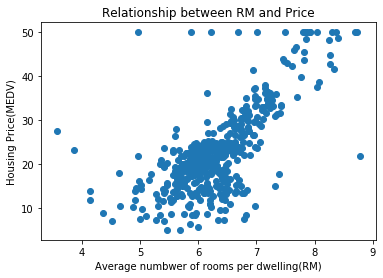

In [20]:
# ch15_3_2b modified
# Picture of "Relationship between RM and Price"

import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]

lm = LinearRegression()
lm.fit(X, y)

plt.scatter(X.RM, y)
plt.xlabel("Average numbwer of rooms per dwelling(RM)")
plt.ylabel("Housing Price(MEDV)")
plt.title("Relationship between RM and Price")
plt.show()

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


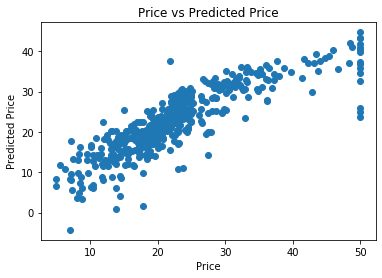

In [17]:
# ch15_3_2c
# depic "Price vs Predicted Price"

import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]

lm = LinearRegression()
lm.fit(X, y)

predicted_price = lm.predict(X)
print(predicted_price[0:5])

plt.scatter(y, predicted_price)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

## Training dataset & test dataset

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=5)

- test_size = 0.33   
    - training data:67%, test data: 33%
- random_state=5    
    - random seed number

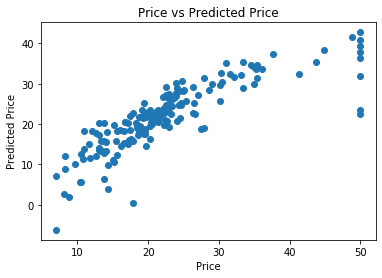

In [22]:
# ch15_3_3
# Price vs Predicted Price in test dataset

import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33,
                                                random_state=5)
lm = LinearRegression()
lm.fit(XTrain, yTrain)

pred_test = lm.predict(XTest)

plt.scatter(yTest, pred_test)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

### Performance of Prediction in Regression

- MSE(Mean Squared Error)
    - 預測時誤差的平方和的平均數
    - (y-predicted_price) ** 2
    - smaller is better
- R-squared (Cofficient of Determination) 決定係數：告訴我們資料是如何符合迴歸線
    - value: 0 ~ 1
    - biger is better
    - LinerRegression_object.score()

In [23]:
# ch15_3_3a

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33,
                                                random_state=5)
lm = LinearRegression()
lm.fit(XTrain, yTrain)

pred_train = lm.predict(XTrain)
pred_test = lm.predict(XTest)

MSE_train = np.mean((yTrain-pred_train)**2)
MSE_test = np.mean((yTest-pred_test)**2)
print("訓練資料的MSE:", MSE_train)
print("測試資料的MSE:", MSE_test)

print("訓練資料的R-squared:", lm.score(XTrain, yTrain))
print("測試資料的R-squared:", lm.score(XTest, yTest))



訓練資料的MSE: 19.54675847353467
測試資料的MSE: 28.530458765974686
訓練資料的R-squared: 0.7551332741779998
測試資料的R-squared: 0.6956551656111596


In [24]:
# ch15_3_3b

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]

lm = LinearRegression()
lm.fit(X, y)

predicted_price = lm.predict(X)
print(predicted_price[0:5])

MSE = np.mean((y-predicted_price)**2)
print("MSE:", MSE)
print("R-squared:", lm.score(X, y))

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]
MSE: 21.894831181729213
R-squared: 0.7406426641094095


In [ ]:
# ch15_3_4
# plot of residual 殘差圖 to highlight outliers (異常值)
# residual = y - predicted_y

import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33,
                                                random_state=5)
lm = LinearRegression()
lm.fit(XTrain, yTrain)

pred_train = lm.predict(XTrain)
pred_test = lm.predict(XTest)

plt.scatter(pred_train, pred_train-yTrain,
            c="b", s=40, alpha=0.5, label="Training Data")
plt.scatter(pred_test, pred_test-yTest,
            c="r", s=40, label="Test Data")
plt.hlines(y=0, xmin=0, xmax=50)
plt.title("Residual Plot")
plt.ylabel("Residual Value")
plt.legend()
plt.show()

## 邏輯迴歸 Logistic Regression

- 主要應用是二元性資料，例如：男或女、成功或失敗、真或假等
- Logistic迴歸和線性迴歸不同，它是在解決分類問題。
- Logistic迴歸的作法和線性迴歸相同，只不過其結果需要使用logistic函數或稱sigmoid函數（即S函數）轉換成0~1之間的機率

In [ ]:
# ch15_4_1

import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-6, 6, 0.1)
S = 1/(1+(np.e**(-t)))

plt.plot(t, S)
plt.title("sigmoid function")
plt.show()

In [ ]:
# ch15_4_2

import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-6, 6, 0.1)
S = 1/(1+(np.e**(-t)))

plt.plot(t, S)
plt.title("sigmoid function")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
PassengerId    1313 non-null int64
Name           1313 non-null object
PClass         1313 non-null object
Age            756 non-null float64
Sex            1313 non-null object
Survived       1313 non-null int64
SexCode        1313 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 71.9+ KB
None
0    1
1    0
2    0
3    0
4    1
Name: Survived, dtype: int64


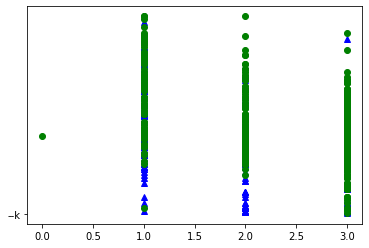

In [34]:
# 區分預測值後，繪出圖形， Lai

import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model

import matplotlib.pyplot as plt


titanic = pd.read_csv("data/titanic.csv")
print(titanic.info())
# 將年齡的空值填入年齡的中位數
age_median = np.nanmedian(titanic["Age"])
new_age = np.where(titanic["Age"].isnull(), 
                   age_median, titanic["Age"])
titanic["Age"] = new_age
# 轉換欄位值成為數值
label_encoder = preprocessing.LabelEncoder()
titanic["PClass"] = label_encoder.fit_transform(titanic["PClass"])

X = pd.DataFrame([titanic["PClass"], 
                  titanic["SexCode"],
                  titanic["Age"]]).T
y = titanic["Survived"]

alive = titanic[titanic["Survived"] == 1]
dead = titanic[titanic["Survived"] == 0]
print(titanic["Survived"][:5])

# red dashes, blue squares and green triangles
plt.plot(alive["PClass"] , alive["Age"], "b^", "--k")
plt.plot(dead["PClass"] , dead["Age"], "go", "--k")
plt.show()

In [ ]:
# ch15_4_2a

import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model

titanic = pd.read_csv("titanic.csv")
print(titanic.info())
# 將年齡的空值填入年齡的中位數
age_median = np.nanmedian(titanic["Age"])
new_age = np.where(titanic["Age"].isnull(), 
                   age_median, titanic["Age"])
titanic["Age"] = new_age
# 轉換欄位值成為數值
label_encoder = preprocessing.LabelEncoder()
encoded_class = label_encoder.fit_transform(titanic["PClass"])

X = pd.DataFrame([encoded_class, 
                  titanic["SexCode"],
                  titanic["Age"]]).T
y = titanic["Survived"]

logistic = linear_model.LogisticRegression()
logistic.fit(X, y)

preds = logistic.predict(X)
print(pd.crosstab(preds, titanic["Survived"]))
pd.crosstab(preds, titanic["Survived"]).to_html("Ch15_4_2a.html")

print((804+265)/(804+185+59+265))
print(logistic.score(X, y))


In [ ]:
# ch15_4_2b

import pandas as pd
from sklearn import preprocessing, linear_model

titanic = pd.read_csv("titanic.csv")
print(titanic.info())
# 轉換欄位值成為數值
label_encoder = preprocessing.LabelEncoder()
encoded_class = label_encoder.fit_transform(titanic["PClass"])

X = pd.DataFrame([encoded_class, 
                  titanic["SexCode"]]).T
y = titanic["Survived"]

logistic = linear_model.LogisticRegression()
logistic.fit(X, y)
print("迴歸係數:", logistic.coef_)
print("截距:", logistic.intercept_ )

preds = logistic.predict(X)
print(pd.crosstab(preds, titanic["Survived"]))
pd.crosstab(preds, titanic["Survived"]).to_html("Ch15_4_2b.html")

print((840+228)/(840+222+23+228))
print(logistic.score(X, y))

###  參考資料: 
- 陳允傑（2018）。Python資料科學與人工智慧應用實務 ch.13, 15
- 邱皓政 量化研究法二